# Handling Missing Categorical Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Datasets/categorical_data.csv')

In [7]:
df.sample(3)

FireplaceQu GarageQual  SalePrice
749         NaN         TA      98000
941          TA         TA     214000
5           NaN         TA     143000

In [8]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

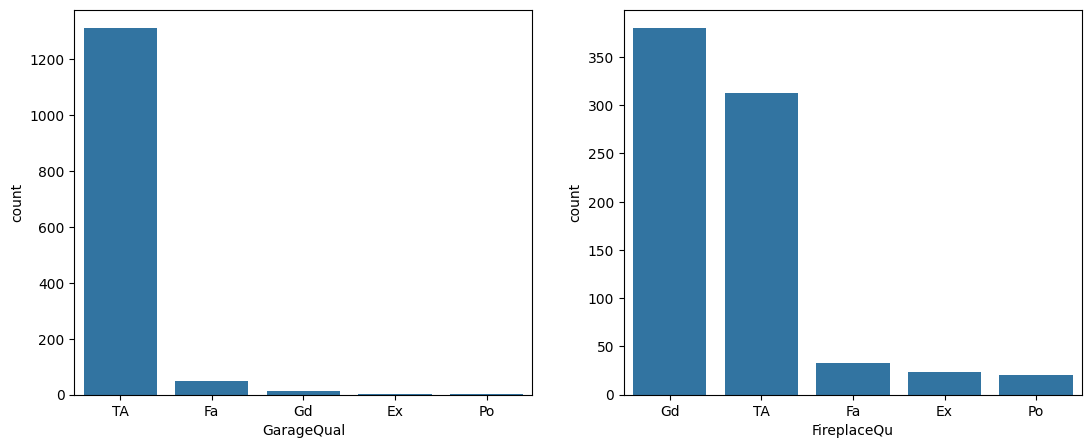

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(df['GarageQual'].value_counts(),ax=ax1)
sns.barplot(df['FireplaceQu'].value_counts(),ax=ax2)
plt.show()

In [12]:
print(df['FireplaceQu'].mode())
print(df['GarageQual'].mode())

0    Gd
Name: FireplaceQu, dtype: object
0    TA
Name: GarageQual, dtype: object


## Simple Imputer:

1. Most frequent imputation: Replaces missing values with the most frequent value in the dataset.
2. Constant imputation: Replaces missing values with a constant value specified by the user.

### 1. Mode: Most frequent imputation

In [22]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

In [24]:
new_X_train = imputer.fit_transform(X_train)
new_X_test = imputer.transform(X_train)

In [25]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [26]:
new_X_train = pd.DataFrame(new_X_train, columns=X_train.columns)
new_X_test = pd.DataFrame(new_X_test, columns=X_test.columns)

In [27]:
new_X_train

FireplaceQu GarageQual
0             Gd         TA
1             Gd         TA
2             Gd         TA
3             Gd         TA
4             TA         TA
...          ...        ...
1163          Gd         TA
1164          Gd         TA
1165          Gd         TA
1166          TA         TA
1167          Gd         TA

[1168 rows x 2 columns]

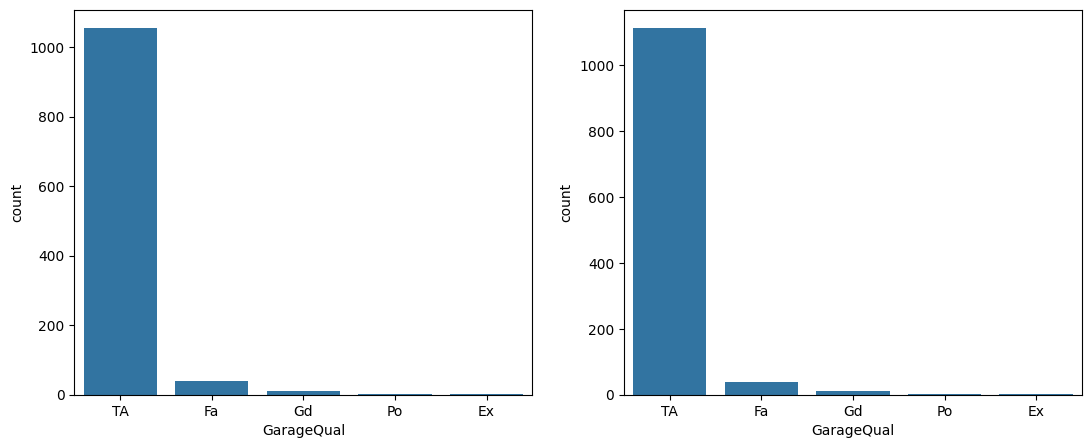

In [29]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['GarageQual'].value_counts(),ax=ax1)
sns.barplot(new_X_train['GarageQual'].value_counts(),ax=ax2)
plt.show()

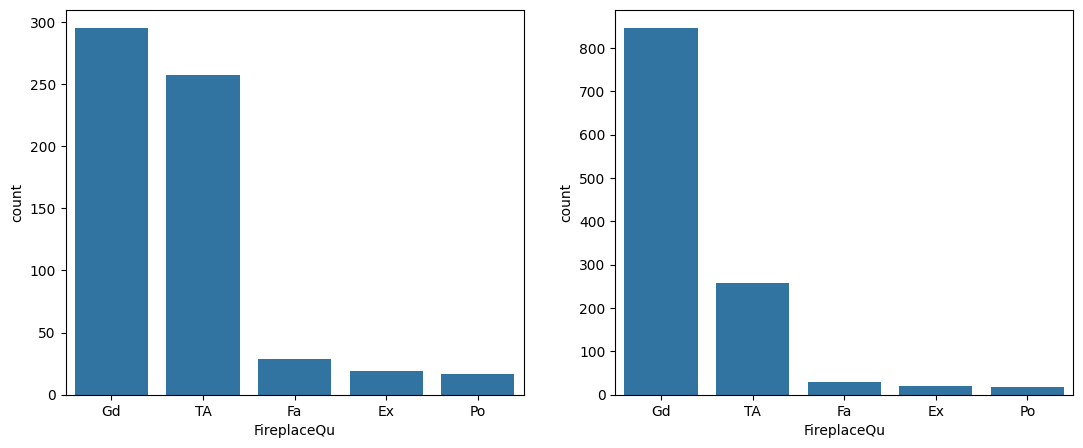

In [30]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['FireplaceQu'].value_counts(),ax=ax1)
sns.barplot(new_X_train['FireplaceQu'].value_counts(),ax=ax2)
plt.show()

### 2. Constant imputation:

In [31]:
X_train

FireplaceQu GarageQual
618           Gd         TA
870          NaN         TA
92           NaN         TA
817           Gd         TA
302           TA         TA
...          ...        ...
763           Gd         TA
835          NaN         TA
1216         NaN         TA
559           TA         TA
684          NaN         TA

[1168 rows x 2 columns]

In [33]:
X_train.isnull().mean()

FireplaceQu    0.471747
GarageQual     0.049658
dtype: float64

In [34]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [35]:
new_X_train = imputer.fit_transform(X_train)
new_X_test = imputer.transform(X_train)

In [36]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

In [37]:
new_X_train = pd.DataFrame(new_X_train, columns=X_train.columns)
new_X_test = pd.DataFrame(new_X_test, columns=X_test.columns)

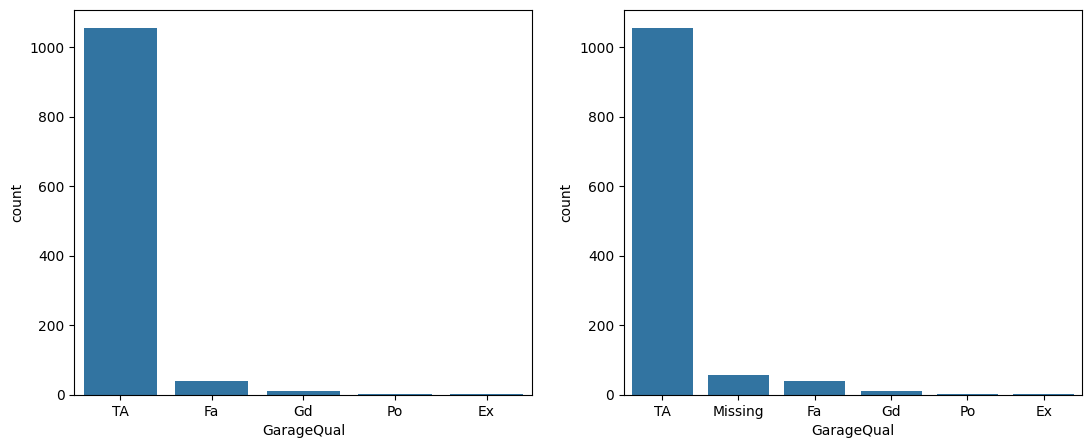

In [38]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['GarageQual'].value_counts(),ax=ax1)
sns.barplot(new_X_train['GarageQual'].value_counts(),ax=ax2)
plt.show()

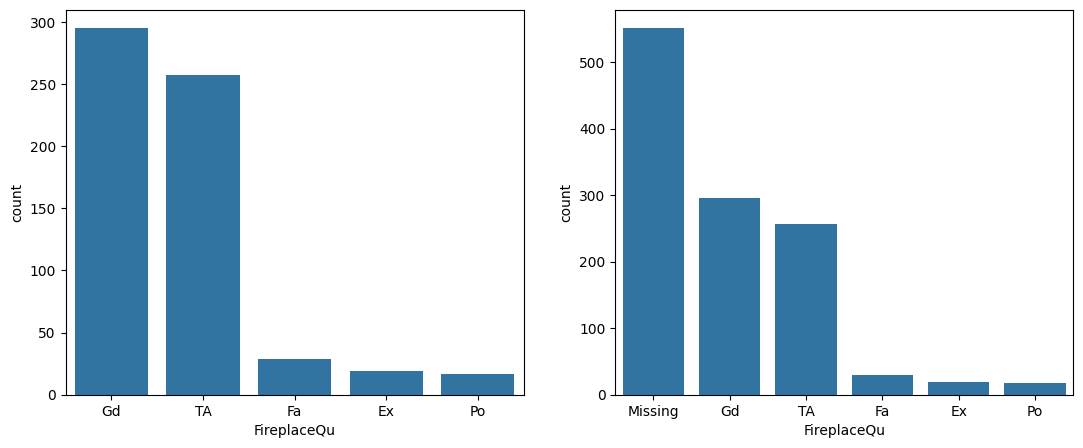

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(13,5))

sns.barplot(X_train['FireplaceQu'].value_counts(),ax=ax1)
sns.barplot(new_X_train['FireplaceQu'].value_counts(),ax=ax2)
plt.show()